<a href="https://colab.research.google.com/github/Xiaolumang/SIT_796_RL/blob/main/task_3_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!jupyter nbconvert --to html /content/drive/MyDrive/task_3_1D.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/task_3_1D.ipynb to html
[NbConvertApp] Writing 1613503 bytes to /content/drive/MyDrive/task_3_1D.html


# 3. code 

In [ ]:
import numpy as np
import gym
!pip install mdp
from collections import Counter
from collections import defaultdict
import sys
import math
import gym
sys.path.insert(0,'/content/drive/MyDrive/SIT_796_RL/Workshop_Pracs')

     |████████████████████████████████| 454 kB 17.4 MB/s 


## Discretize state 
position: 0-9
speed:0-9
terminal state is (100, 100) 

In [ ]:
min_pos = -1.2
max_pos = 0.6
max_speed = 0.07
goal_pos = 0.5
goal_velocity = 0
pos_interval = np.linspace(min_pos, max_pos, 11)
print(pos_interval)
speed_interval = np.linspace(-max_speed, max_speed, 11)
def discretize(state):
  state = list(state)
  pos,speed = state
  done = bool(
            pos >= goal_pos and speed >= goal_velocity
        )
  # 100,100 is terminal state
  if done:
    return 100,100
  if state[0] == max_pos:
    state[0] = max_pos-0.001
  if state[1] == max_speed:
    state[1] = max_speed - 0.001
  return np.digitize(state[0], pos_interval[1:]), np.digitize(state[1],speed_interval[1:])


[-1.2  -1.02 -0.84 -0.66 -0.48 -0.3  -0.12  0.06  0.24  0.42  0.6 ]


In [ ]:
np.digitize(0.07, pos_interval[1:])

7

In [ ]:
# from discretized state to bin boundaries
def get_bin_by_group(dis_state):
  dis_pos, dis_speed = dis_state
  return (pos_interval[dis_pos], speed_interval[dis_speed]), (pos_interval[dis_pos+1], speed_interval[dis_speed+1])

# for each discretized state (dis_pos, dis_speed)
    1. calculate real position and speed boundaries
    2. using its corresponding boundaries, sample 5000 times from uniform distribution to attain real pos, speed
    3. using formulas from gym mountain_car.py to calculate real pos and speed in next step with each action in action space
    4. calculate discretized next state: dis_state_next
    5. count the number of sequence for dis_state,action,dis_state_next in trans



In [ ]:
trans = dict()
env = gym.make('MountainCar-v0')
actions = env.action_space.n
for dis_pos in range(10):
  for dis_speed in range(10):
    dis_state = (dis_pos, dis_speed)
    tmp = get_bin_by_group(dis_state)
    states = np.random.uniform(low=tmp[0], high=tmp[1],size=(5000,2))
    for state in states:
      for action in range(env.action_space.n):
        pos, speed = state[0], state[1]
        speed += (action-1)*0.001 - math.cos(3*pos) *0.0025
        speed = np.clip(speed, -max_speed,max_speed)
        pos += speed
        pos = np.clip(pos, min_pos,max_pos)
        if (pos == min_pos and speed < 0):
          speed = 0
        state_next= (pos, speed)

        dis_state_next = discretize(state_next)
        trans[dis_state,action,dis_state_next] = trans.get((dis_state,action, dis_state_next),0) +1




In [ ]:
# check top 20 in trans
# key is dis_state, action, dis_state_next
for x in sorted(trans, key=trans.get, reverse=True)[:20]:
  print(x, trans[x])

((4, 4), 2, (4, 4)) 4733
((4, 5), 2, (4, 5)) 4716
((9, 4), 1, (9, 4)) 4695
((3, 4), 1, (3, 4)) 4688
((2, 4), 0, (2, 4)) 4660
((8, 4), 2, (8, 4)) 4653
((3, 5), 1, (3, 5)) 4652
((8, 5), 2, (8, 5)) 4651
((2, 5), 0, (2, 5)) 4641
((3, 5), 0, (3, 5)) 4586
((3, 4), 0, (3, 4)) 4562
((9, 9), 2, (100, 100)) 4521
((4, 5), 1, (4, 5)) 4511
((9, 4), 2, (9, 4)) 4504
((9, 9), 1, (100, 100)) 4496
((5, 5), 2, (5, 5)) 4478
((9, 9), 0, (100, 100)) 4472
((4, 4), 1, (4, 4)) 4463
((5, 4), 2, (5, 4)) 4417
((9, 4), 0, (9, 4)) 4399


# verify that each (dis_state, action) pair is sampled 5000 times

In [ ]:
c = Counter()
for x in trans:
  c.update({x[:-1]:trans[x]})
print(c.items())

dict_items([(((0, 0), 0), 5000), (((0, 0), 1), 5000), (((0, 0), 2), 5000), (((0, 1), 0), 5000), (((0, 1), 1), 5000), (((0, 1), 2), 5000), (((0, 2), 0), 5000), (((0, 2), 1), 5000), (((0, 2), 2), 5000), (((0, 3), 0), 5000), (((0, 3), 1), 5000), (((0, 3), 2), 5000), (((0, 4), 0), 5000), (((0, 4), 1), 5000), (((0, 4), 2), 5000), (((0, 5), 0), 5000), (((0, 5), 1), 5000), (((0, 5), 2), 5000), (((0, 6), 0), 5000), (((0, 6), 1), 5000), (((0, 6), 2), 5000), (((0, 7), 0), 5000), (((0, 7), 1), 5000), (((0, 7), 2), 5000), (((0, 8), 0), 5000), (((0, 8), 1), 5000), (((0, 8), 2), 5000), (((0, 9), 0), 5000), (((0, 9), 1), 5000), (((0, 9), 2), 5000), (((1, 0), 0), 5000), (((1, 0), 1), 5000), (((1, 0), 2), 5000), (((1, 1), 0), 5000), (((1, 1), 1), 5000), (((1, 1), 2), 5000), (((1, 2), 0), 5000), (((1, 2), 1), 5000), (((1, 2), 2), 5000), (((1, 3), 0), 5000), (((1, 3), 1), 5000), (((1, 3), 2), 5000), (((1, 4), 0), 5000), (((1, 4), 1), 5000), (((1, 4), 2), 5000), (((1, 5), 0), 5000), (((1, 5), 1), 5000), (

In [ ]:

mydict = lambda: defaultdict(mydict)
transition_probs = mydict()
for x in trans:
  transition_probs[str(x[0])][str(x[1])][str(x[2])] = trans[x]/c.get((x[0],x[1]))


In [ ]:
# terminal state is (100, 100) 
transition_probs[str((100,100))]={}

In [ ]:
from mdp import MDP
# construct mdp with no rewards, only to use mdp.get_all_states and mdp.get_possible_actions for convenience
mdp = MDP(transition_probs, rewards={},initial_state=str((1,4)))

In [ ]:
rewards = mydict()
for s in mdp.get_all_states():
  for action in mdp.get_possible_actions(s):
    for s_next in mdp.get_all_states():
      if mdp.get_transition_prob(s,action,s_next) != 0.0:
        rewards[s][action][s_next] = -1

In [ ]:
# generate mdp with rewards
#initial_state can be random because it is not important for policy iteration
mdp = MDP(transition_probs, rewards=rewards,initial_state=str((3,5)))

In [ ]:
transition_probs

defaultdict(<function __main__.<lambda>>,
            {'(0, 0)': defaultdict(<function __main__.<lambda>>,
                         {'0': defaultdict(<function __main__.<lambda>>,
                                      {'(0, 0)': 0.5842,
                                       '(0, 1)': 0.0698,
                                       '(0, 5)': 0.346}),
                          '1': defaultdict(<function __main__.<lambda>>,
                                      {'(0, 0)': 0.5424,
                                       '(0, 1)': 0.1168,
                                       '(0, 5)': 0.3408}),
                          '2': defaultdict(<function __main__.<lambda>>,
                                      {'(0, 0)': 0.4928,
                                       '(0, 1)': 0.1706,
                                       '(0, 5)': 0.3366})}),
             '(0, 1)': defaultdict(<function __main__.<lambda>>,
                         {'0': defaultdict(<function __main__.<lambda>>,
                

In [ ]:
# verify terminal state works fine
for s in mdp.get_all_states():
  if mdp.is_terminal(s):
    print(s)

(100, 100)


Graphviz available: True


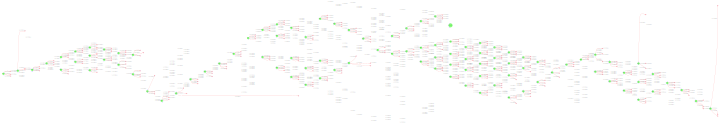

In [ ]:
from mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)
if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, plot_graph_optimal_strategy_and_state_values
    display(plot_graph(mdp))
    

In [ ]:
# get Q value using Bellman equation
def get_action_value(mdp, state_values, state, action, gamma):
  if mdp.is_terminal(state):
    return 100
  Q = 0
  for s in mdp.get_all_states():
    if mdp.is_terminal(s):
      continue
    Q = Q+ mdp.get_transition_prob(state, action, s) *(mdp.get_reward(state,action,s) + gamma*state_values[s])
  return Q

In [ ]:
# optimal action for a state and its Q value
def get_new_state_value(mdp, state_values,state, gamma):
  if mdp.is_terminal(state):
    return 100
  rst = dict()
  for action in mdp.get_possible_actions(state):
    rst[action] = get_action_value(mdp, state_values,state,action, gamma)
  arg_max = max(rst, key=rst.get)
  return arg_max, rst[arg_max]



# Policy iteration

In [ ]:
def policy_evaluation(policy,state_values, gamma):
  theta = 0.01
 
  state_values = state_values.copy()
  while True:
    delta = 0
    for s in mdp.get_all_states():
      if not mdp.is_terminal(s):
        v = state_values[s]
        tmp = 0
     
        for s_next in mdp.get_next_states(s, policy[s][0]):
          action = policy[s][0]
          tmp += mdp.get_transition_prob(s,action,s_next)*(mdp.get_reward(s,action,s_next)+ gamma*state_values[s_next])
        state_values[s] = tmp   
        delta = max(delta, abs(tmp-v))
       # print(delta)
    if delta < theta:
      break
  return state_values


def policy_improvement(state_values,policy ):
  state_values = state_values.copy()
  policy = policy.copy()
  for s in mdp.get_all_states():
    if not mdp.is_terminal(s):
  
      tmp = dict()
      for a in mdp.get_possible_actions(s):
        q_value = 0
      #  print(type(a),a)
        for next_s in mdp.get_next_states(s,a):
          q_value += mdp.get_transition_prob(s, a, next_s)*(mdp.get_reward(s,a,next_s)+gamma*state_values[next_s])
        tmp[a] = q_value
      
      max_action = max(tmp, key=lambda x:tmp[x])
      policy[s] = [str(x) for x,y in tmp.items() if y == tmp[max_action]]
  return policy

In [ ]:
def check_stable(old, new):
  for k in new:
    #print(new[k],old[k])
    if len(np.intersect1d(new[k], old[k])) == 0:
      return False
  return True

In [ ]:
gamma = 0.9
num_iter = 100
min_difference = 0.001
policy = dict()
state_values = dict()
for s in mdp.get_all_states():
  policy[s] = [str(0)]  # accelerate to the left
  state_values[s] = 0

stable = False
count = 0
while not stable:
  count +=1
  state_values = policy_evaluation(policy,state_values, gamma)
  print('evaluation')
  old_policy = policy
  policy = policy_improvement(state_values,policy)
  print('improvement')
  stable = check_stable(old_policy, policy)
  #print(stable)
print(count)




evaluation
improvement
evaluation
improvement
evaluation
improvement
evaluation
improvement
evaluation
improvement
evaluation
improvement
6


In [ ]:
def get_optimal_action(mdp, state_values, state, gamma):
  if mdp.is_terminal(state):
    return None
  nsv = get_new_state_value(mdp, state_values, state,gamma)
  return nsv[0]


# Test in mdp

In [ ]:
s = mdp.reset()
max_step = 200
for step in range(max_step):
  if not mdp.is_terminal(s):
    action = policy[s][0]
    s, r, done, _ = mdp.step(action)
    if mdp.is_terminal(s):
      print(s,step)
      break

(100, 100) 133


In [ ]:
# install required system dependencies
# install required system dependencies
!apt-get install -y xvfb x11-utils 
!apt-get install x11-utils > /dev/null 2>&1
!pip install PyVirtualDisplay==2.0.* \
  PyOpenGL==3.1.* \
  PyOpenGL-accelerate==3.1.* \
  gym[box2d]==0.17.* 
!pip install pyglet



Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 993 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 993 kB in 0s (9,047 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2

# Test in gym MountainCar_v0

In [ ]:
def run_episode():
  env = gym.make('MountainCar-v0')
  state = env.reset()

  i = 0

  for _ in range(200):
    i = i + 1
    dis_state = discretize(state)
  #print(dis_state)
    action = policy[str(dis_state)][0]
  #print(int(action), dis_state,state)

    state, r, done, _ = env.step(int(action)) # Take action from DNN in actual training.
    if done:
      return i



# test performance in 1000 episode

In [ ]:
result = []
for _ in range(1000):
  result.append(run_episode())
print(f'average steps needed in one episode is {np.mean(result)}')

average steps needed in one episode is 145.911


In [ ]:
!rm ./vid/*.*
from gym.wrappers import Monitor
from IPython import display
from pyvirtualdisplay import Display
import gym


import base64
import io
import IPython

d = Display()
d.start()

env = gym.make('MountainCar-v0')
env = Monitor(env,'./vid',force=True)


state = env.reset()

i = 0
result = []
for _ in range(200):
  i = i + 1
  dis_state = discretize(state)
  #print(dis_state)
  action = policy[str(dis_state)][0]
  #print(int(action), dis_state,state)

  state, r, done, _ = env.step(int(action)) # Take action from DNN in actual training.

    

  if done:
    print(f'i is {i}',state)
    env.reset()
    break
  
for f in env.videos:
 
    video = io.open(f[0], 'r+b').read()
    encoded = base64.b64encode(video)

    display.display(display.HTML(data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))))


rm: cannot remove './vid/*.*': No such file or directory
i is 120 [0.50277302 0.02157025]


# Calculate average reward for 1000 steps

In [ ]:
env = gym.make('MountainCar-v0')
state = env.reset()
reward = []
for _ in range(1000):
  dis_state = discretize(state)
  #print(dis_state)
  action = policy[str(dis_state)][0]

  state, r, done, _ = env.step(int(action)) # Take action from DNN in actual training.
  reward.append(r)
  if done:
    state = env.reset()
print('mean reward over 1000 steps:' ,np.mean(reward))

mean reward over 1000 steps: -1.0
